<a href="https://colab.research.google.com/github/nandorrefi/Android-labor-kotlin/blob/master/ef831f9e7f9c301186534f617846416e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1 - Nándor Réfi (IDYW5S)

## 1. Reading in five 128x128 image and printing them out as matrices

In [ ]:
from matplotlib import image
import os

folder = 'images'

# read in images
images = []
img_files = ["forest.jpg", "grass.jpg", "guitar.jpg", "moon.jpg", "smiley.png"]
for file in img_files:
    img = image.imread(file)
    images.append(img)

In [ ]:
import numpy as np

data = []

# convert images to arrays
for img in images:
  data.append(np.asarray(img))

In [ ]:
print(data)

[array([[[ 70,  88,  26],
        [100, 135,  33],
        [108, 144,  46],
        ...,
        [ 70,  94,  20],
        [ 79, 106,  39],
        [ 63,  83,  24]],

       [[ 68,  87,  23],
        [ 93, 119,  32],
        [ 85, 113,  28],
        ...,
        [ 71,  94,  24],
        [ 63,  76,  20],
        [ 60,  72,  22]],

       [[113, 155,  43],
        [104, 129,  46],
        [ 80,  95,  40],
        ...,
        [ 67,  88,  19],
        [ 66,  88,  15],
        [ 58,  79,  14]],

       ...,

       [[ 57,  59,  19],
        [ 54,  56,  17],
        [ 57,  63,  15],
        ...,
        [ 57,  40,  14],
        [ 60,  43,  17],
        [ 63,  46,  20]],

       [[ 51,  53,  16],
        [ 58,  61,  18],
        [ 63,  65,  16],
        ...,
        [ 54,  38,  15],
        [ 53,  35,  11],
        [ 79,  70,  55]],

       [[ 52,  52,  14],
        [ 60,  63,  16],
        [ 63,  66,  19],
        ...,
        [ 49,  30,  13],
        [ 51,  33,   9],
        [ 63,  50,  31]

## 2. Printing out average and deviaton of RGB channels then transform the datasets into having 0 expected value and 1 deviation

In [ ]:
# separate RGB values
R = []
G = []
B = []
for i in data:
  for row in i:
    for pixel in row:
      R.append(pixel[0])
      G.append(pixel[1])
      B.append(pixel[2])

In [ ]:
def print_array_avg_and_dev(name, array):
  print(name, 'average:', np.average(array), ', deviation:', np.std(array))

In [ ]:
print_array_avg_and_dev('R', R)
print_array_avg_and_dev('G', G)
print_array_avg_and_dev('B', B)

R average: 75.012955 , deviation: 72.25811
G average: 84.09276 , deviation: 74.303955
B average: 52.299683 , deviation: 64.77234


In [ ]:
# transform an array to have 0 expected value and 1 deviation
def transform_array(a):
  res = a.copy()
  avg = np.average(res)
  dev = np.std(res)
  for i in range(len(res)):
    res[i] = (res[i] - avg)/dev
  return res

In [ ]:
R = transform_array(R)
G = transform_array(G)
B = transform_array(B)

In [ ]:
# close enough
print_array_avg_and_dev('R', R)
print_array_avg_and_dev('G', G)
print_array_avg_and_dev('B', B)

R average: -5.9604645e-08 , deviation: 1.0
G average: 2.3841858e-08 , deviation: 1.0
B average: 3.576279e-08 , deviation: 0.99999994


## 3. Reading in an audio file and representing it on a spectogram

In [ ]:
import wave
import sys
import matplotlib.pyplot as plt

# open audiofile
file = wave.open('audio1.wav', "r")

# create array of signals
raw = file.readframes(-1)
signal = np.frombuffer(raw, np.int16)


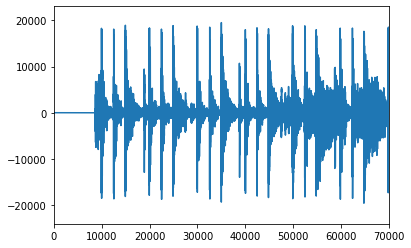

In [ ]:
# plot spectogram
plt.plot(signal)
plt.xlim([0, 70000])
plt.show()

## 4. Creating a histogram on the frequency of letters in web page text

In [ ]:
import requests
from bs4 import BeautifulSoup
from collections import defaultdict

In [ ]:
# read in text from html
url = 'https://en.wikipedia.org/wiki/Deep_learning'
html = requests.get(url).text
text = BeautifulSoup(html).get_text()

In [ ]:
# calculate frequency of letters
dictionary = defaultdict(int)
for char in text:
    if 'a' < char < 'z' or 'A' < char < 'Z':
        dictionary[char] += 1

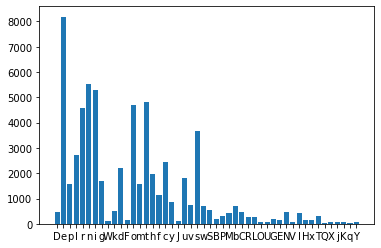

In [ ]:
# plot histogram
plt.bar(range(len(dictionary)), list(dictionary.values()), align='center')
plt.xticks(range(len(dictionary)), list(dictionary.keys()))
plt.show()